# Tox21 Dataset

#### Author: Amitha Kethavath

##### Description:

Tox21 is a multiclass binary classification dataset. This file contains the following tasks: 
- Exploratory Data Analysis
- Data Imputation using rdkit(an Open-Source Chemistry+Bioinformatics library)
- EDA Visualisation
- Train/Validation/Test Split

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import torch
import sys,os

## Step 1: Exploratory Data Analysis

In [2]:
df=pd.read_csv('tox21.csv')

In [3]:
df.head(20)

NR-AR  NR-AR-LBD  NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  \
0     0.0        0.0     1.0           NaN    NaN        0.0            0.0   
1     0.0        0.0     0.0           0.0    0.0        0.0            0.0   
2     NaN        NaN     NaN           NaN    NaN        NaN            NaN   
3     0.0        0.0     0.0           0.0    0.0        0.0            0.0   
4     0.0        0.0     0.0           0.0    0.0        0.0            0.0   
5     0.0        0.0     0.0           0.0    0.0        0.0            0.0   
6     0.0        0.0     0.0           0.0    0.0        0.0            0.0   
7     0.0        NaN     0.0           NaN    1.0        NaN            NaN   
8     0.0        0.0     0.0           0.0    0.0        0.0            0.0   
9     NaN        NaN     NaN           NaN    NaN        NaN            NaN   
10    0.0        0.0     0.0           NaN    0.0        0.0            0.0   
11    0.0        0.0     NaN           NaN    0.0        0.0            0.0   
12    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
13    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
14    0.0        0.0     0.0           NaN    0.0        0.0            NaN   
15    0.0        0.0     0.0           0.0    0.0        0.0            1.0   
16    0.0        0.0     0.0           NaN    0.0        NaN            NaN   
17    0.0        0.0     0.0           0.0    NaN        0.0            0.0   
18    0.0        0.0     NaN           0.0    NaN        NaN            0.0   
19    NaN        NaN     NaN           NaN    NaN        NaN            NaN   

    SR-ARE  SR-ATAD5  SR-HSE  SR-MMP  SR-p53    mol_id  \
0      1.0       0.0     0.0     0.0     0.0   TOX3021   
1      NaN       0.0     NaN     0.0     0.0   TOX3020   
2      0.0       NaN     0.0     NaN     NaN   TOX3024   
3      NaN       0.0     NaN     0.0     0.0   TOX3027   
4      0.0       0.0     0.0     0.0     0.0  TOX20800   
5      NaN       0.0     0.0     0.0     0.0   TOX5110   
6      0.0       0.0     0.0     0.0     0.0   TOX6619   
7      1.0       0.0     1.0     0.0     1.0  TOX25232   
8      0.0       0.0     0.0     NaN     0.0  TOX22514   
9      0.0       NaN     0.0     NaN     NaN  TOX22517   
10     NaN       0.0     NaN     NaN     0.0  TOX25236   
11     0.0       0.0     0.0     0.0     0.0  TOX25238   
12     0.0       0.0     0.0     0.0     0.0   TOX6612   
13     0.0       0.0     0.0     0.0     0.0   TOX6615   
14     1.0       0.0     0.0     0.0     NaN  TOX15748   
15     0.0       0.0     0.0     0.0     0.0  TOX14833   
16     NaN       NaN     0.0     NaN     NaN  TOX26529   
17     NaN       0.0     NaN     0.0     0.0  TOX26524   
18     NaN       0.0     0.0     0.0     0.0  TOX26525   
19     0.0       NaN     0.0     NaN     NaN  TOX26526   

                                               smiles  
0                        CCOc1ccc2nc(S(N)(=O)=O)sc2c1  
1                           CCN1C(=O)NC(c2ccccc2)C1=O  
2   CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...  
3                     CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C  
4                           CC(O)(P(=O)(O)O)P(=O)(O)O  
5                CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C  
6                                 O=S(=O)(Cl)c1ccccc1  
7              O=C(O)Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1  
8                       OC[C@H](O)[C@@H](O)[C@H](O)CO  
9            CCCCCCCC(=O)[O-].CCCCCCCC(=O)[O-].[Zn+2]  
10  NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(...  
11    O=c1[nH]c(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1I  
12                                  CC(C)COC(=O)C(C)C  
13                         C=C(C)C(=O)OCCOC(=O)C(=C)C  
14                    Cl/C=C\C[N+]12CN3CN(CN(C3)C1)C2  
15                           O=C([O-])Cc1cccc2ccccc12  
16                                 CCCCCCCCCCOCC(O)CN  
17                               CCN(CC)C(=O)c1cccnc1  
18                                   COc1cc(O)cc(O)c1  
19   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7831 entries, 0 to 7830
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NR-AR          7265 non-null   float64
 1   NR-AR-LBD      6758 non-null   float64
 2   NR-AhR         6549 non-null   float64
 3   NR-Aromatase   5821 non-null   float64
 4   NR-ER          6193 non-null   float64
 5   NR-ER-LBD      6955 non-null   float64
 6   NR-PPAR-gamma  6450 non-null   float64
 7   SR-ARE         5832 non-null   float64
 8   SR-ATAD5       7072 non-null   float64
 9   SR-HSE         6467 non-null   float64
 10  SR-MMP         5810 non-null   float64
 11  SR-p53         6774 non-null   float64
 12  mol_id         7831 non-null   object 
 13  smiles         7831 non-null   object 
dtypes: float64(12), object(2)
memory usage: 856.6+ KB


## Observation: 
The paper that we have referrerd to uses marked loss which only uses non-NaN values. This means null values are ignored. In order to combat this, we use data imputation techniques to avoid this case. 

## Step 2: Data Imputation

In [5]:
from sklearn.ensemble import RandomForestClassifier
from rdkit import Chem
from rdkit.Chem import AllChem
# from rdkit.Chem.rdMolDescriptors import GetMorganGenerator


#### We use Rdkit, which is an open-source toolkit for chemistry and  bioinformatics.
##### Use the following command to install rdkit

In [6]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable


In [7]:
def moleculeFeaturiser(smilesList, radius=2, n_bits=2048):
    fingerPrint = []
    for smile in smilesList:
        molecule = Chem.MolFromSmiles(smile)
        if molecule:
            fprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius, nBits=n_bits)
            fingerPrint.append(np.array(fprint))
        else:
            fingerPrint.append(np.zeros(n_bits))
    return np.array(fingerPrint)

In [8]:
df1 = df.copy()
labelColumns = [column for column in df1.columns if column not in ['smiles', 'mol_id']]

In [9]:
for varLabel in labelColumns:
    knownVar = df1[df1[varLabel].notna()]
    unknownVar = df1[df1[varLabel].isna()]
    
    if knownVar.empty or unknownVar.empty:
        continue  #If either of the known or unkonwn variable is empty, then move to the next iteration.

    X_train = moleculeFeaturiser(knownVar['smiles'])
    y_train = knownVar[varLabel]

    RFCmodel = RandomForestClassifier(n_estimators=100, random_state=41)
    RFCmodel.fit(X_train, y_train)

    missingX = moleculeFeaturiser(unknownVar['smiles'])
    df1.loc[unknownVar.index, varLabel] = RFCmodel.predict(missingX)


[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerator
[18:28:15] DEPRECATION WARNING: please use MorganGenerat

In [10]:
df1

NR-AR  NR-AR-LBD  NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  \
0       0.0        0.0     1.0           0.0    1.0        0.0            0.0   
1       0.0        0.0     0.0           0.0    0.0        0.0            0.0   
2       1.0        0.0     0.0           0.0    1.0        1.0            0.0   
3       0.0        0.0     0.0           0.0    0.0        0.0            0.0   
4       0.0        0.0     0.0           0.0    0.0        0.0            0.0   
...     ...        ...     ...           ...    ...        ...            ...   
7826    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
7827    1.0        1.0     0.0           0.0    1.0        0.0            0.0   
7828    1.0        1.0     0.0           0.0    1.0        1.0            0.0   
7829    1.0        1.0     0.0           1.0    1.0        1.0            0.0   
7830    0.0        0.0     0.0           0.0    0.0        0.0            0.0   

      SR-ARE  SR-ATAD5  SR-HSE  SR-MMP  SR-p53    mol_id  \
0        1.0       0.0     0.0     0.0     0.0   TOX3021   
1        0.0       0.0     0.0     0.0     0.0   TOX3020   
2        0.0       0.0     0.0     1.0     0.0   TOX3024   
3        0.0       0.0     0.0     0.0     0.0   TOX3027   
4        0.0       0.0     0.0     0.0     0.0  TOX20800   
...      ...       ...     ...     ...     ...       ...   
7826     0.0       0.0     0.0     0.0     0.0   TOX2725   
7827     0.0       0.0     0.0     0.0     0.0   TOX2370   
7828     1.0       0.0     0.0     0.0     0.0   TOX2371   
7829     0.0       0.0     0.0     1.0     1.0   TOX2377   
7830     0.0       0.0     0.0     1.0     0.0   TOX2724   

                                                 smiles  
0                          CCOc1ccc2nc(S(N)(=O)=O)sc2c1  
1                             CCN1C(=O)NC(c2ccccc2)C1=O  
2     CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...  
3                       CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C  
4                             CC(O)(P(=O)(O)O)P(=O)(O)O  
...                                                 ...  
7826  CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...  
7827  CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...  
7828  C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...  
7829  C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...  
7830            COc1ccc2c(c1OC)CN1CCc3cc4c(cc3C1C2)OCO4  

[7831 rows x 14 columns]

### In order to make it look more aesthetically simple to comprehend, let's shift the last two columns in the front.

In [11]:
df1Columns=df1.columns.tolist()

In [12]:
tempVar = ['smiles', 'mol_id'] + [column for column in df1Columns if column not in ['smiles', 'mol_id']]
df1 = df1[tempVar]

In [13]:
df1

smiles    mol_id  NR-AR  \
0                          CCOc1ccc2nc(S(N)(=O)=O)sc2c1   TOX3021    0.0   
1                             CCN1C(=O)NC(c2ccccc2)C1=O   TOX3020    0.0   
2     CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...   TOX3024    1.0   
3                       CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C   TOX3027    0.0   
4                             CC(O)(P(=O)(O)O)P(=O)(O)O  TOX20800    0.0   
...                                                 ...       ...    ...   
7826  CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...   TOX2725    0.0   
7827  CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...   TOX2370    1.0   
7828  C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...   TOX2371    1.0   
7829  C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...   TOX2377    1.0   
7830            COc1ccc2c(c1OC)CN1CCc3cc4c(cc3C1C2)OCO4   TOX2724    0.0   

      NR-AR-LBD  NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  \
0           0.0     1.0           0.0    1.0        0.0            0.0   
1           0.0     0.0           0.0    0.0        0.0            0.0   
2           0.0     0.0           0.0    1.0        1.0            0.0   
3           0.0     0.0           0.0    0.0        0.0            0.0   
4           0.0     0.0           0.0    0.0        0.0            0.0   
...         ...     ...           ...    ...        ...            ...   
7826        0.0     0.0           0.0    0.0        0.0            0.0   
7827        1.0     0.0           0.0    1.0        0.0            0.0   
7828        1.0     0.0           0.0    1.0        1.0            0.0   
7829        1.0     0.0           1.0    1.0        1.0            0.0   
7830        0.0     0.0           0.0    0.0        0.0            0.0   

      SR-ARE  SR-ATAD5  SR-HSE  SR-MMP  SR-p53  
0        1.0       0.0     0.0     0.0     0.0  
1        0.0       0.0     0.0     0.0     0.0  
2        0.0       0.0     0.0     1.0     0.0  
3        0.0       0.0     0.0     0.0     0.0  
4        0.0       0.0     0.0     0.0     0.0  
...      ...       ...     ...     ...     ...  
7826     0.0       0.0     0.0     0.0     0.0  
7827     0.0       0.0     0.0     0.0     0.0  
7828     1.0       0.0     0.0     0.0     0.0  
7829     0.0       0.0     0.0     1.0     1.0  
7830     0.0       0.0     0.0     1.0     0.0  

[7831 rows x 14 columns]

In [14]:
# Use the following  command to save the df1 into a csv file:
#df1.to_csv('Tox21Clean.csv' sep='\t')

## Step 3: EDA Visualisation

In [15]:
from rdkit import Chem
from rdkit.Chem import Draw

subset = df1.sample(frac=1.0, random_state=0)

moleculeList = [Chem.MolFromSmiles(smile) for smile in subset['smiles']]
molIds = subset['mol_id'].tolist()

#Visualising using RDKIT.
img = Draw.MolsToGridImage(
    moleculeList,
    legends=molIds,
    molsPerRow=4,
    subImgSize=(200, 200)
)

[18:30:18] WARNING: not removing hydrogen atom without neighbors
[18:30:18] Explicit valence for atom # 9 Al, 6, is greater than permitted
[18:30:18] Explicit valence for atom # 5 Al, 6, is greater than permitted
[18:30:18] Explicit valence for atom # 3 Al, 6, is greater than permitted
[18:30:18] Explicit valence for atom # 4 Al, 6, is greater than permitted
[18:30:19] Explicit valence for atom # 20 Al, 6, is greater than permitted
[18:30:19] Explicit valence for atom # 4 Al, 6, is greater than permitted
[18:30:19] Explicit valence for atom # 8 Al, 6, is greater than permitted
[18:30:19] Explicit valence for atom # 16 Al, 6, is greater than permitted
/home/gingfreecss/.local/lib/python3.13/site-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


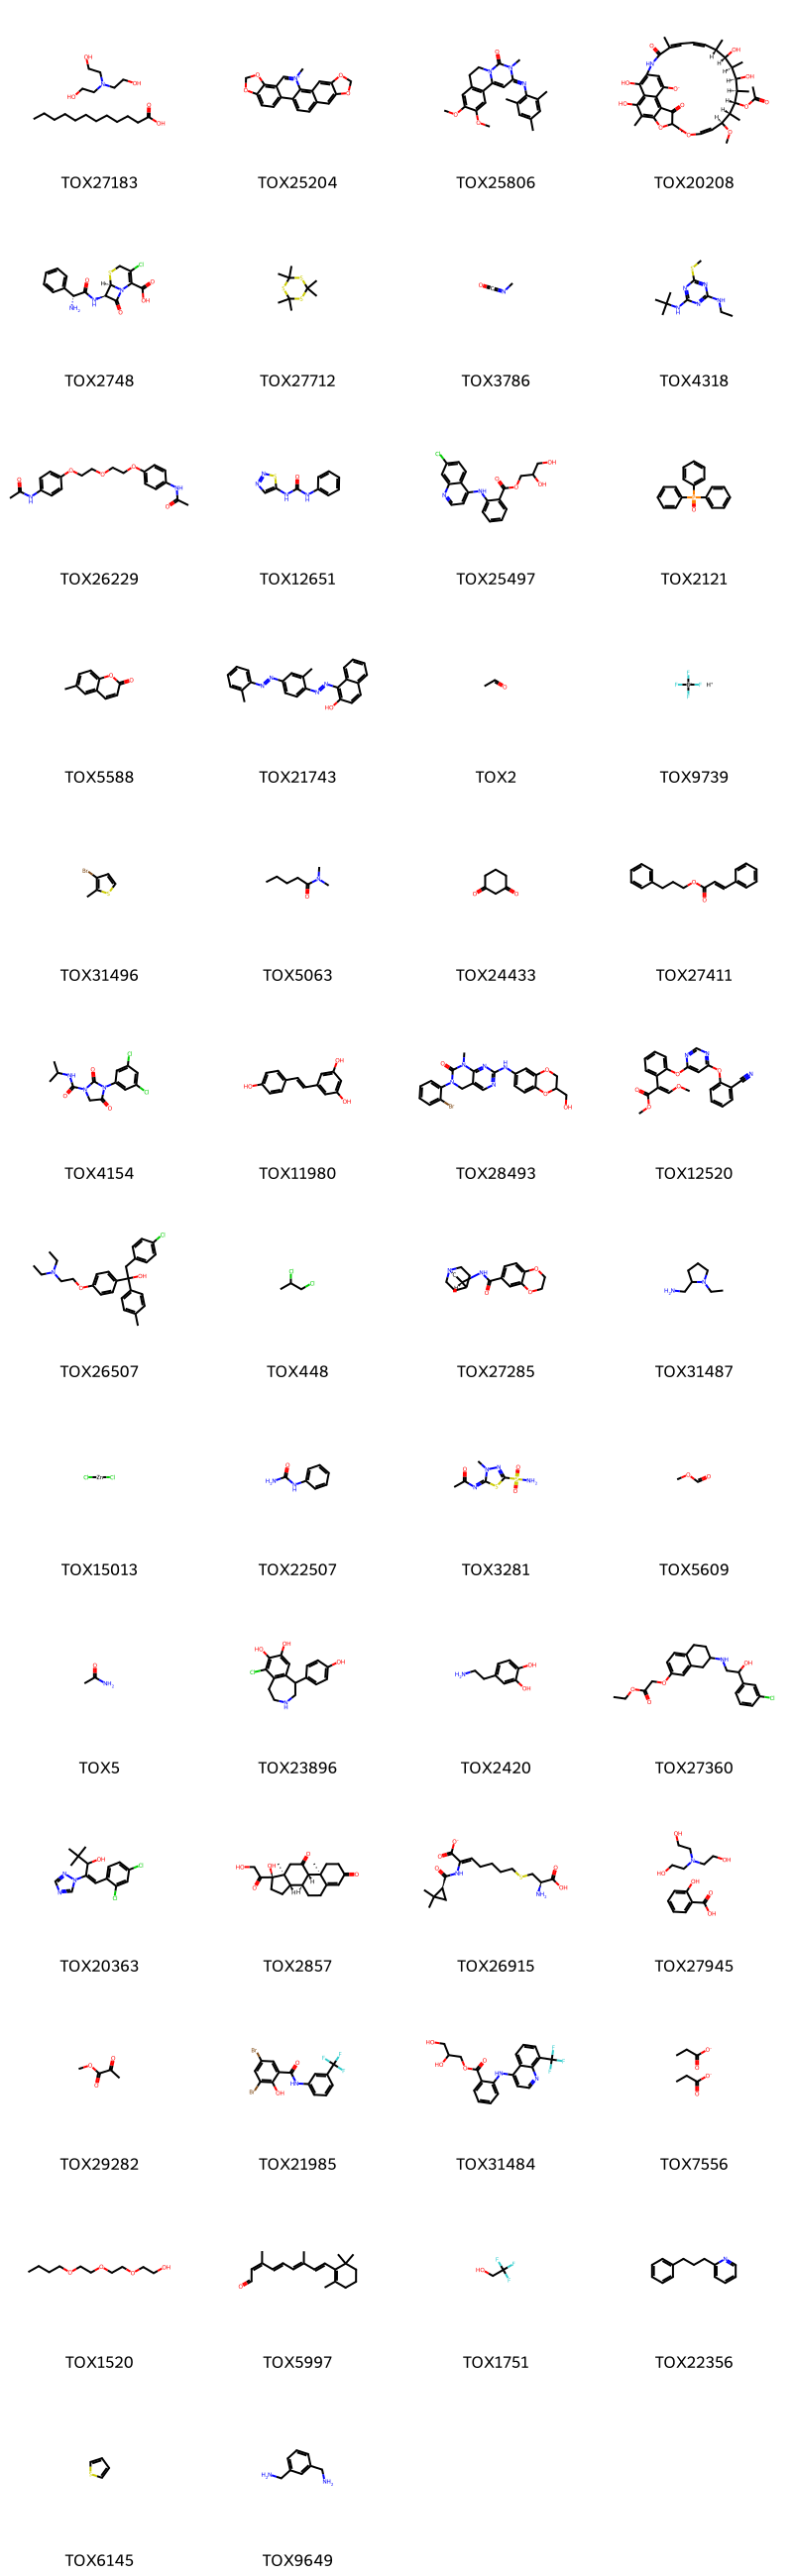

In [16]:
img

## Step 4: Train/Validation/Test Split

The final step of our Checkpoint is to create a Train/Vallidation/Test Split. For this, we have decided to select a ratio of 70:15:15

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_temporary = train_test_split(df1, test_size=0.2, random_state=42, shuffle=True)


In [20]:
X_val, X_test = train_test_split(X_temporary, test_size=0.5, random_state=42, shuffle=True)


In [21]:
X_train

smiles    mol_id  NR-AR  \
1737                                          CCCCC=O   TOX1653    0.0   
6109   O=C(O)[C@@H](O)[C@H](O)[C@H](O)[C@@H](O)C(=O)O  TOX28666    0.0   
1158              CN(C)CC[C@@H](c1ccc(Cl)cc1)c1ccccn1  TOX28962    0.0   
4689                       O=c1nc([O-])n(Cl)c(=O)n1Cl   TOX6178    0.0   
5187                                            ClCCl    TOX868    0.0   
...                                               ...       ...    ...   
5226  COc1ccc(C(=O)Nc2nc3ccccc3c(NCc3ccccc3)c2C#N)cc1  TOX27374    0.0   
5390                            CC(C)Nc1nc(N)nc(Cl)n1  TOX17494    0.0   
860                                       CCCCOC(O)CC   TOX9755    0.0   
7603      C=CCC1=C(C)C(OC(=O)C2C(C=C(C)C)C2(C)C)CC1=O  TOX15180    0.0   
7270                                    CCCCCCCCCCC=O   TOX1688    0.0   

      NR-AR-LBD  NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  \
1737        0.0     0.0           0.0    0.0        0.0            0.0   
6109        0.0     0.0           0.0    0.0        0.0            0.0   
1158        0.0     0.0           0.0    0.0        0.0            0.0   
4689        0.0     0.0           0.0    0.0        0.0            0.0   
5187        0.0     0.0           0.0    0.0        0.0            0.0   
...         ...     ...           ...    ...        ...            ...   
5226        0.0     1.0           0.0    0.0        0.0            0.0   
5390        0.0     0.0           0.0    0.0        0.0            0.0   
860         0.0     0.0           0.0    0.0        0.0            0.0   
7603        0.0     0.0           0.0    0.0        0.0            0.0   
7270        0.0     0.0           0.0    1.0        0.0            0.0   

      SR-ARE  SR-ATAD5  SR-HSE  SR-MMP  SR-p53  
1737     0.0       0.0     0.0     0.0     0.0  
6109     0.0       0.0     0.0     0.0     0.0  
1158     0.0       0.0     0.0     0.0     0.0  
4689     0.0       0.0     0.0     0.0     0.0  
5187     0.0       0.0     0.0     0.0     0.0  
...      ...       ...     ...     ...     ...  
5226     0.0       0.0     0.0     1.0     0.0  
5390     0.0       0.0     0.0     0.0     0.0  
860      0.0       0.0     0.0     0.0     0.0  
7603     0.0       0.0     1.0     0.0     0.0  
7270     0.0       0.0     0.0     0.0     0.0  

[6264 rows x 14 columns]